<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/Ex1_Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd /content/drive/My Drive/MachineLearning/ex1-linear regression

/content/drive/My Drive/MachineLearning/ex1-linear regression


# <font face=STCAIYUN color=purple Size=10>Linear Regresion</font>

In [0]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [0]:
df = pd.read_csv('ex1data1.txt', names=['population','profit']) # 读取数据，并给定列名

In [16]:
df.head() # 查看前五行数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
population    97 non-null float64
profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


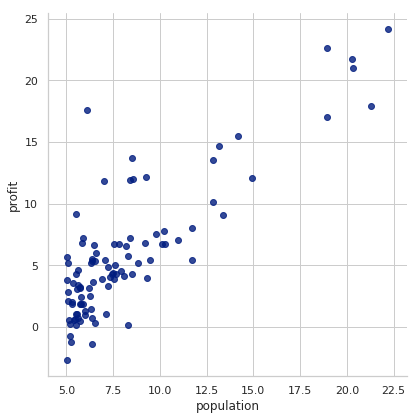

In [20]:
sns.lmplot('population','profit', df, size=6, fit_reg=False )
plt.show()

<font face=楷体><font color=green size=4>**绿色链接**</font>  

【1】[Pandas中loc和iloc函数用法详解](https://blog.csdn.net/W_weiying/article/details/81411257)  
【2】[Python中的lambda和apply用法](https://zhuanlan.zhihu.com/p/42756654)
    
</font>

In [0]:
def get_X(df): # 读取特征
    """
    用concat合并特征
    concat对于大数据集效率不高
    """
    ones = pd.DataFrame({'ones':np.ones(len(df))}) # ones是m行1列的DataFrame
    data = pd.concat([ones, df],axis = 1) # 合并数据，根据列合并
    return data.iloc[:, : -1].as_matrix() # 返回ndarray，不是矩阵

def get_y(df): # 读取标签
    """
    读取最后一列作为标签
    """
    return np.array(df.iloc[:, -1]) # df.iloc[:, -1]是df的最后一列

def normalize_feature(df):
    """
    沿着DataFrame的输入轴(默认为0)标准化特征
    """
    return df.apply(lambda column: (column.mean()) / column.std()) # 特征缩放



<font face=楷体><font color=green size=4>**绿色链接**</font>  
【1】[TensorFlow入门（七） 充分理解 name / variable_scope](https://blog.csdn.net/Jerr__y/article/details/70809528)
    
</font>


In [0]:
def linear_regression(X_data, y_data, alpha, optimizer=tf.train.GradientDescentOptimizer):
    # 创建占位符
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.palceholder(tf.float32, shape=y_data.shape)
    
    # 创建图形
    with tf.variable_scope('linear-regression'):
        W = tf.get_variable("weights",
                            (X_data.shape[1],1),
                            initializer=tf.constant_initializer())
        y_pred = tf.matmul(X, W) # m*n @ n*1 -> m*1
        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a = True) #  (m*1).T @ m*1 = 1*1
    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)
    
    # 运行会话
    with th.Session() as sess:
        sess.run(tf.gloabal_variables_initializer())
        loss_data = []
        
        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0,0]) # 每个loss_val 都是1*1 ndarray
            
            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:# 收敛时提前跳出循环
            #print ("Converged as epoch {}".formaat(i))
                break
    # 清除图
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val} # 返回行向量的形式

In [0]:
data = pd.read_csv('ex1data1.txt', names= ['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [0]:
X = get_X(data)
print(X.shape, type(X))
print(X[:5:]) #查看前⑤行

y = get_y(data)
print(y.shape, type(y)) # 查看数据维度

(97, 3) <class 'numpy.ndarray'>
[[ 1.       5.4369   0.61705]
 [ 1.      13.394    9.0551 ]
 [ 1.       8.2934   0.14454]
 [ 1.       5.3054   1.9869 ]
 [ 1.       5.8707   7.2029 ]]
(97,) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
theta = np.zeros(X.shape[1]) # X.shape[1]=2代表特征数

In [0]:
def lr_cost(theta, X, y):
    """
    X: R(m*n), m 样本数, n 特征数
    y: R(m)
    theta : R(n), 线性回归的参数
    """
    m = X.shape[0] # 样本数
    inner = X @ theta - y # R(m*1),等价于X.dot(theta)
    square_sum = inner.T @ inner # .T表示转置
    cost = square_sum / (2 * m)
    
    return cost

In [0]:
lr_cost(theta, X, y) #返回cost

32.072733877455676

In [0]:
def gradient(theta, X, y): # 求梯度
    m = X.shape[0]
    inner = X.T @ (X @ theta - y) # (m,n).T @ (m, 1) -> (n, 1)
    
    return inner / m

In [0]:
def batch_gradient_decent(theta,X, y, epoch, alpha=0.01):
    """
    批量梯度下降函数
    拟合线性回归，返回参数和代价
    epoch:批处理次数
    """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy() # 拷贝
    
    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
        
        
    return _theta, cost_data

In [0]:
epoch = 500
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

In [0]:
final_theta　# ？？？？？？？？？

array([ 1.81549343,  0.76855256, -0.42390162])

In [0]:
cost_data

[32.072733877455676,
 20.692455197812173,
 18.53467081819576,
 17.86081067576754,
 17.462924255430863,
 17.147380799919915,
 16.878779827678173,
 16.646998954789815,
 16.446465516360583,
 16.27285515264102,
 16.122506038117983,
 15.992264453438102,
 15.879405898251576,
 15.781575368819478,
 15.696737043894867,
 15.623130992998467,
 15.559235783065303,
 15.503736157392193,
 15.455495095359236,
 15.413529658617193,
 15.376990110515269,
 15.345141865178059,
 15.317349882767223,
 15.293065179431059,
 15.27181316536828,
 15.253183563267834,
 15.236821692958857,
 15.222420937127765,
 15.209716228049372,
 15.19847841696844,
 15.188509406518717,
 15.179637942775821,
 15.171715977553212,
 15.164615523664343,
 15.158225936346277,
 15.152451563093214,
 15.147209711974584,
 15.142428895277984,
 15.138047311166188,
 15.13401153109348,
 15.130275365097766,
 15.12679888086346,
 15.123547555716756,
 15.120491543538897,
 15.117605041024246,
 15.114865739820315,
 15.112254352911487,
 15.109754205185107,

In [0]:
lr_cost(final_theta, X, y)

14.630994731836749

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


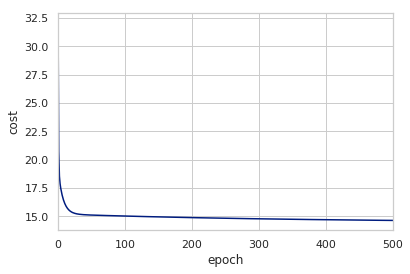

In [0]:
ax = sns.tsplot(cost_data, time=np.arange(epoch+1)) #　？？？？
ax.set_xlabel("epoch")
ax.set_ylabel("cost")
plt.show()

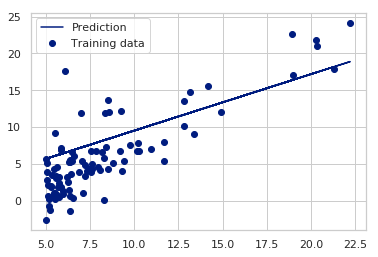

In [0]:
b = final_theta[0] # intercept,Y轴上的截距
m = final_theta[1] # slope,斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

# 3 - 选修部分

In [0]:
raw_data = pd.read_csv("ex1data2.txt", names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**标准化数据**

In [0]:
def normalize_feature(df):
    """
    标准化数据
    """
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [0]:
data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


**多变量批量梯度下降（multi-var batch gradient decent）**

In [0]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))#看下数据的维度和类型

(47, 4) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
alpha = 0.01 # 学习率
theta = np.zeros(X.shape[1]) # X.shape[1]：特征数n
epoch = 500 # 轮数

In [0]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


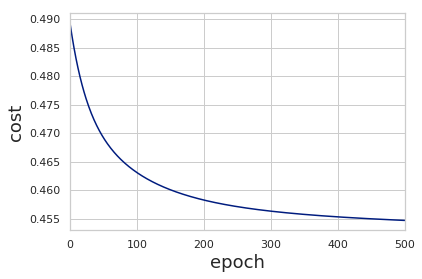

In [0]:
sns.tsplot(time = np.arange(len(cost_data)), data = cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

In [0]:
final_theta

array([-4.41254598e-17,  1.03788801e-02, -1.17633118e-01,  2.67442968e-01])

**学习率（learning rate）**

In [0]:
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


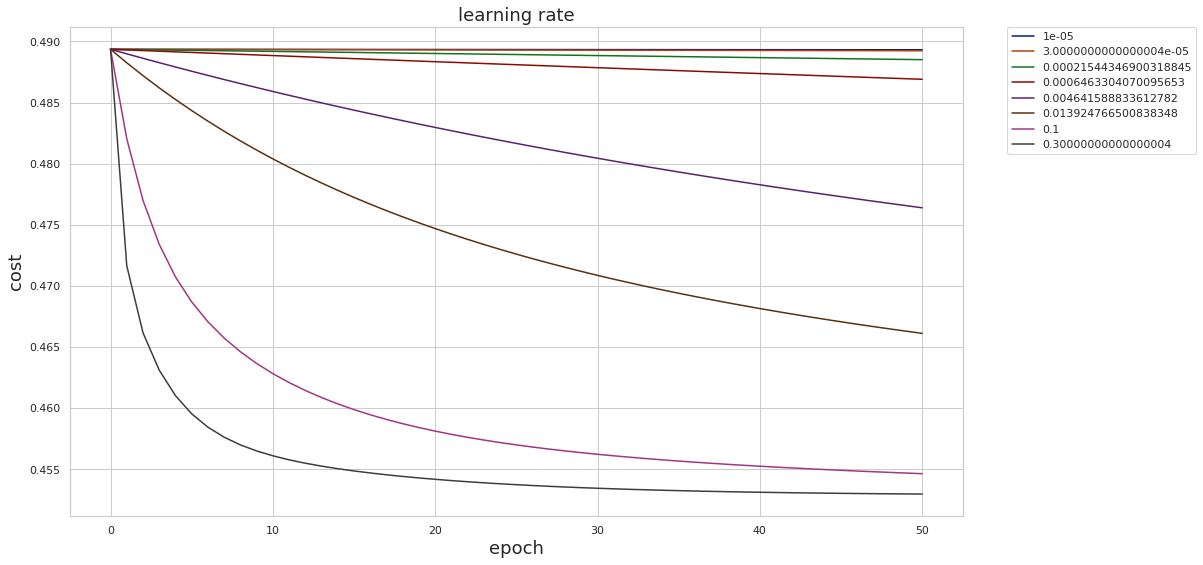

In [0]:
epoch = 50

fig , ax = plt.subplots(figsize = (16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label = alpha)
    
ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()

**正规方程（normal equation）**

正规方程是通过求解：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 得到最小化代价函数参数。

$\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。 

上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

In [0]:
def normalEqn(X, y):
    """
    正规方程
    """
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return theta

In [0]:
final_theta2 = normalEqn(X, y)
final_theta2

array([-2.77555756e-17, -1.08788316e-01, -1.04208924e-01,  3.81064902e-01])

In [0]:
X_data = get_X(data)
print(X_data.shape, type(X_data))

y_data = get_y(data).reshape(len(X_data), 1)
print(y_data.shape, type(y_data))

(47, 4) <class 'numpy.ndarray'>
(47, 1) <class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [0]:
epoch = 200
alpha = 0.01

In [0]:
optimizer_dict = {
    'GD' : tf.train.GradientDescentOptimizer,
    'Adagrad': tf.train.AdagradOptimizer,
    'Adam' : tf.train.AdamOptimizer,
    'Ftrl' : tf.train.FtrlOptimizer,
    'RMS' : tf.train.RMSPropOptimizer
}
results = []
for name in optimizer_dict:
    res = linear_regression(X_data, y_data, alpha, epoch, optimizer=optimizer_dict[name])
    res['name'] = name
    results.append(res)

TypeError: ignored

No handles with labels found to put in legend.


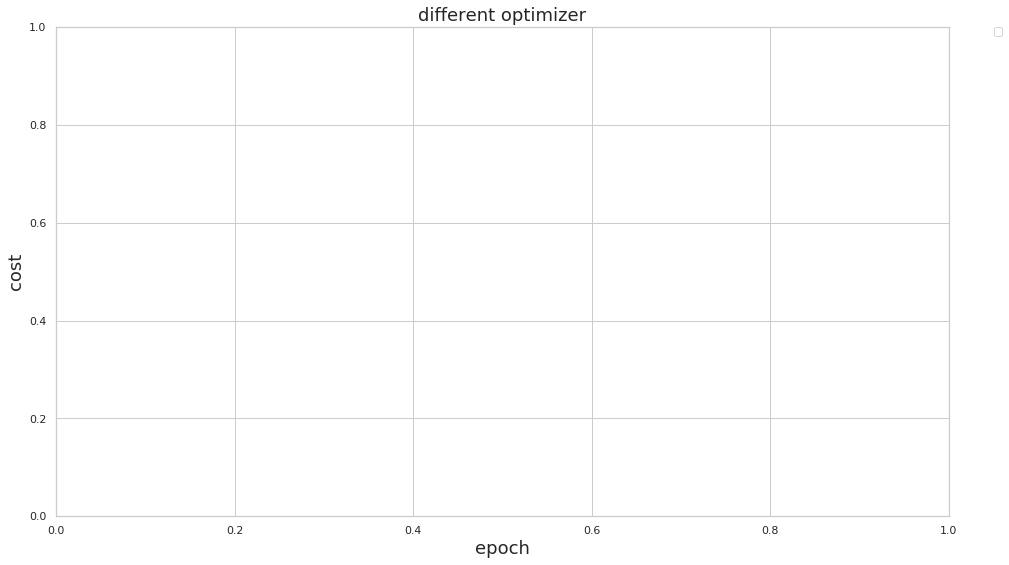

In [0]:
fig, ax = plt.subplots(figsize = (16, 9))

for res in results:
    loss_data = res['loss']
    ax.plot(np.arange(len(loss_data)), loss_data, label=res['name'])
    
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('cost', fontsize = 18)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
ax.set_title('different optimizer', fontsize = 18)
plt.show()